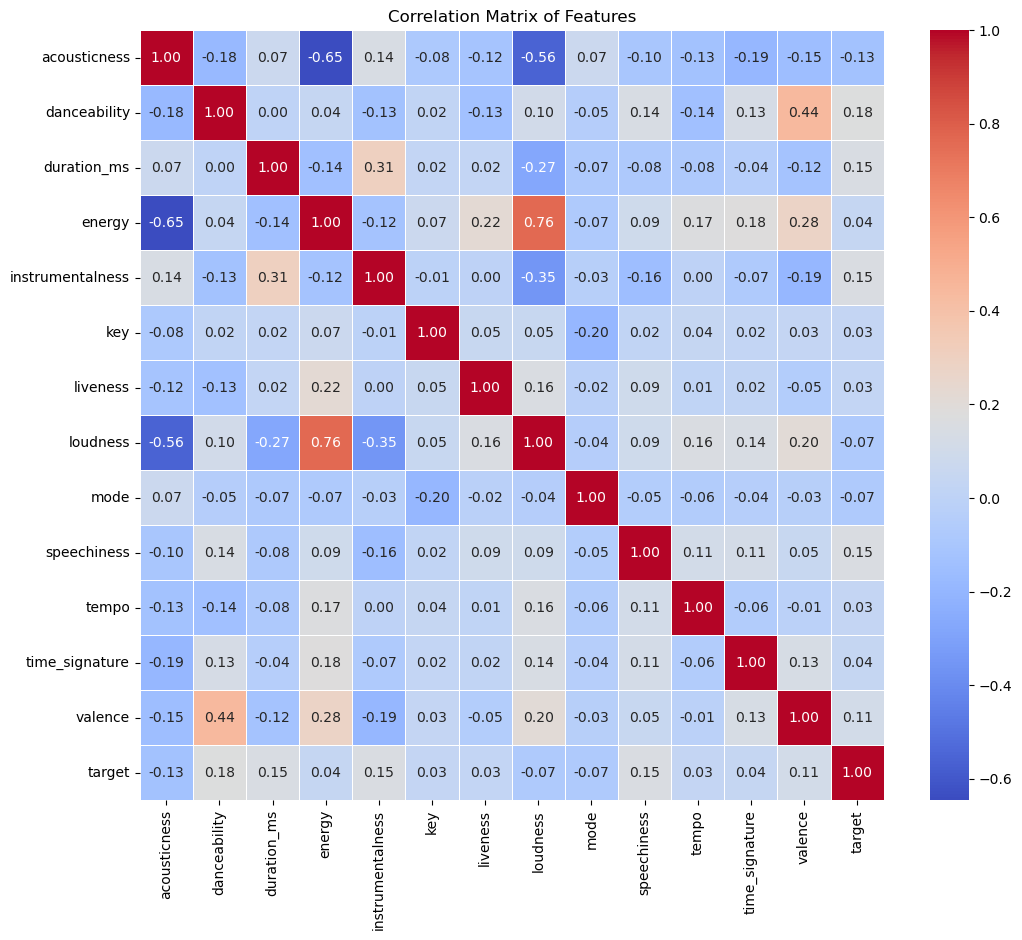

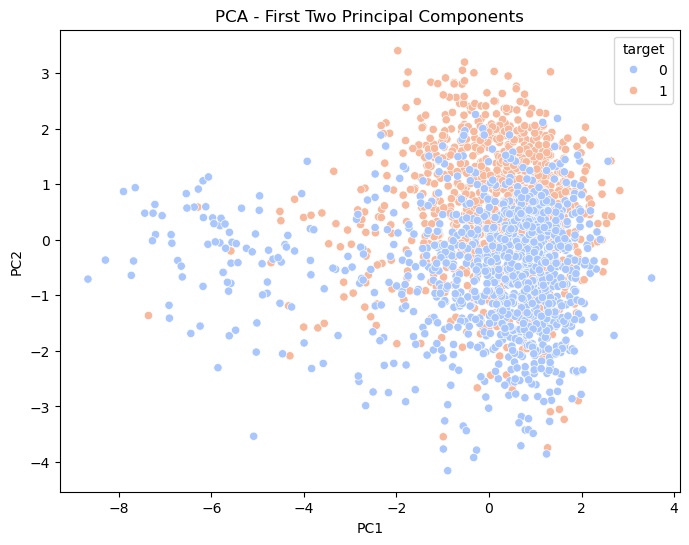

In [18]:
# Multivariate Analysis Mini Project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA
import statsmodels.api as sm
from sklearn.cross_decomposition import CCA


# Load dataset
df = pd.read_csv("data.csv")
df = df.drop(columns=['Unnamed: 0', 'song_title', 'artist'])

# Separate features and target
X = df.drop(columns='target')
y = df['target']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Correlation Matrix
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

## 2. Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm')
plt.title("PCA - First Two Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()






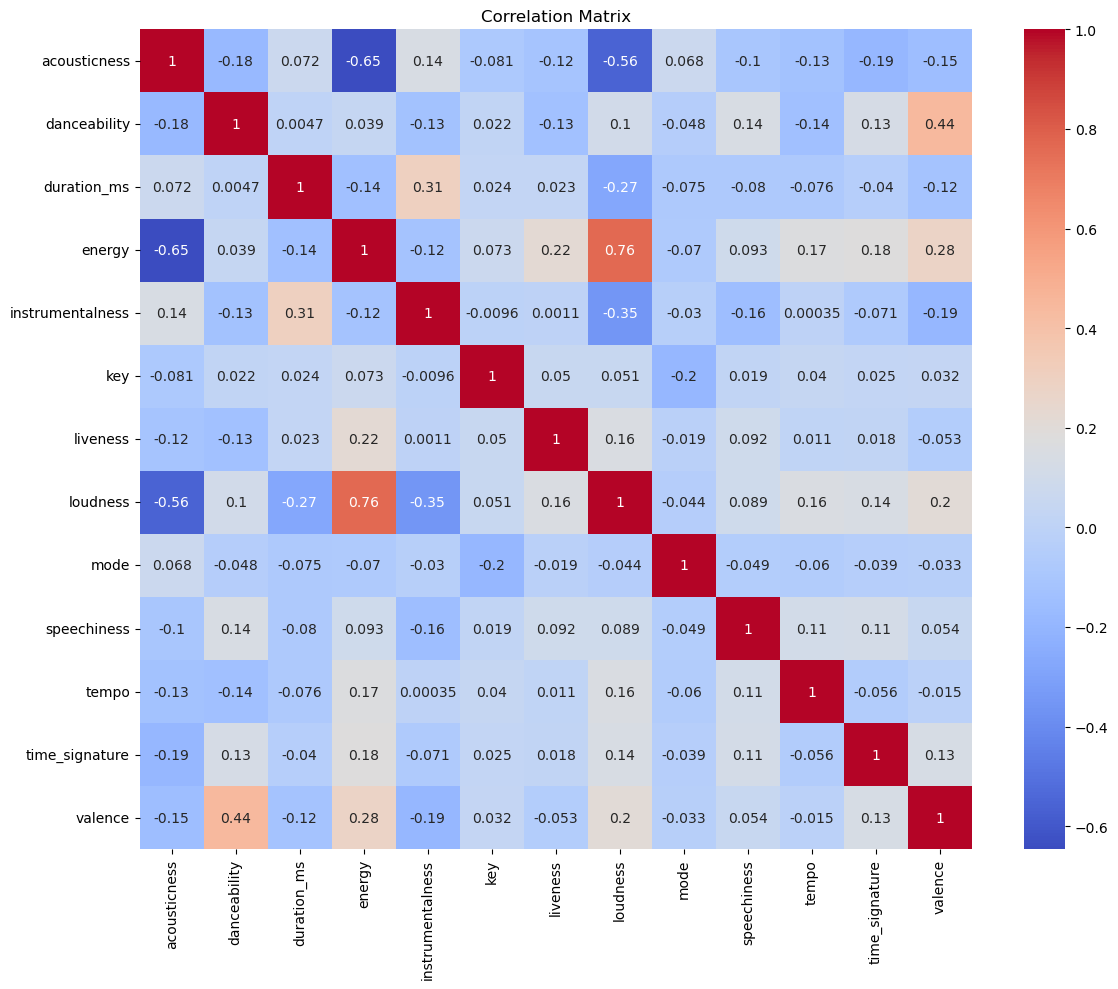

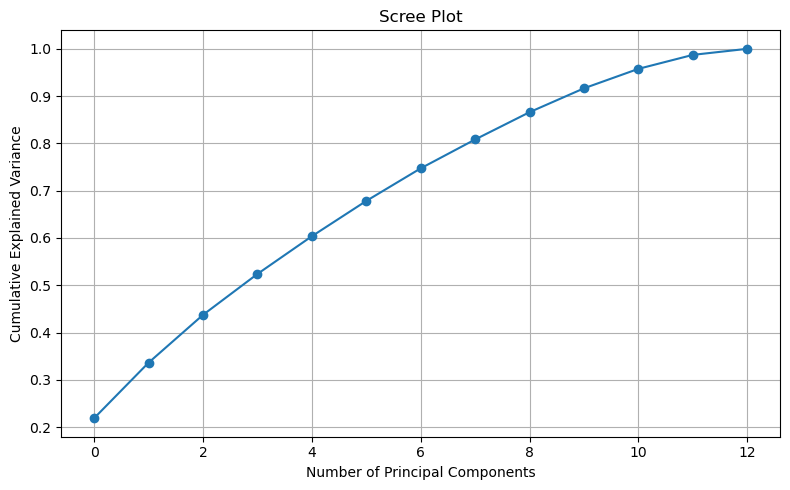

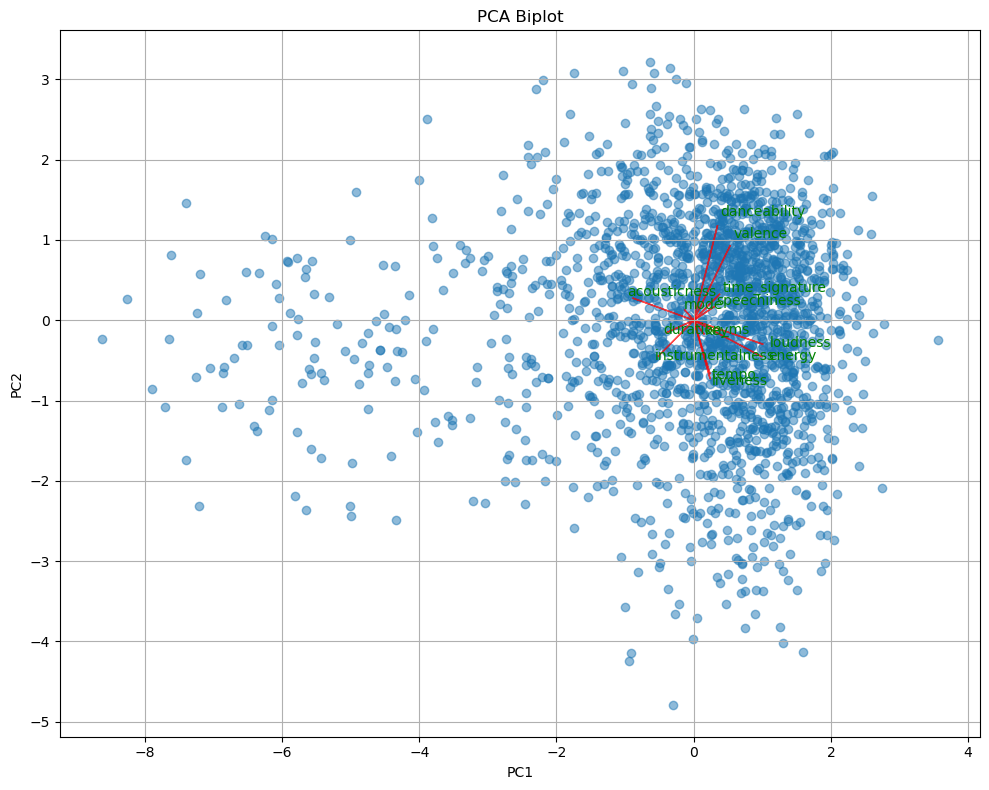

In [20]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv("data.csv")

# --- Data Cleaning ---
df.drop(columns=["Unnamed: 0", "target", "song_title", "artist"], inplace=True)

# Select numeric features
numeric_cols = df.select_dtypes(include=np.number).columns
X = df[numeric_cols]

# --- Data Standardization ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Correlation Matrix ---
plt.figure(figsize=(12, 10))
sns.heatmap(pd.DataFrame(X_scaled, columns=numeric_cols).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# --- PCA ---
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained Variance
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.grid(True)
plt.tight_layout()
plt.show()

# Choose optimal components (e.g., 2 for visualization)
pca_opt = PCA(n_components=2)
X_pca_2D = pca_opt.fit_transform(X_scaled)

# Biplot
def biplot(scores, coeffs, labels=None):
    xs, ys = scores[:, 0], scores[:, 1]
    n = coeffs.shape[0]
    plt.figure(figsize=(10, 8))
    plt.scatter(xs, ys, alpha=0.5)
    for i in range(n):
        plt.arrow(0, 0, coeffs[i, 0]*2, coeffs[i, 1]*2, color='r', alpha=0.7)
        if labels is not None:
            plt.text(coeffs[i, 0]*2.2, coeffs[i, 1]*2.2, labels[i], color='g')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA Biplot")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

biplot(X_pca_2D, np.transpose(pca_opt.components_), labels=numeric_cols)



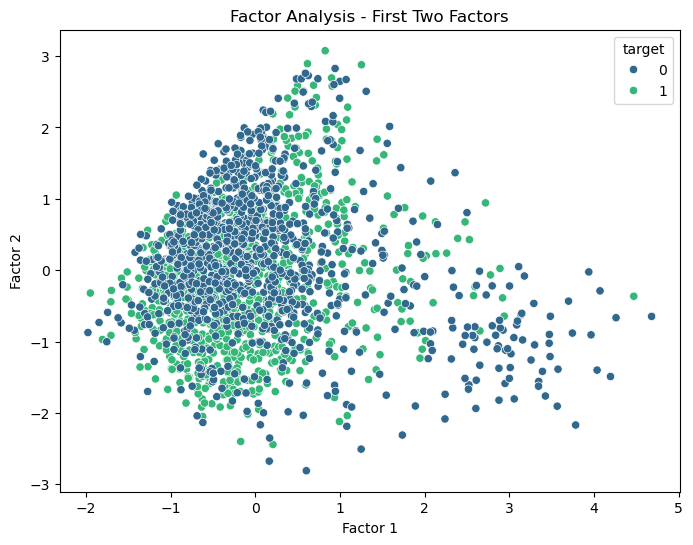

In [13]:
## 3. Factor Analysis
fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_fa[:, 0], y=X_fa[:, 1], hue=y, palette='viridis')
plt.title("Factor Analysis - First Two Factors")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.show()

Accuracy: 0.6485148514851485
Confusion Matrix:
 [[134  72]
 [ 70 128]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.65      0.65       206
           1       0.64      0.65      0.64       198

    accuracy                           0.65       404
   macro avg       0.65      0.65      0.65       404
weighted avg       0.65      0.65      0.65       404



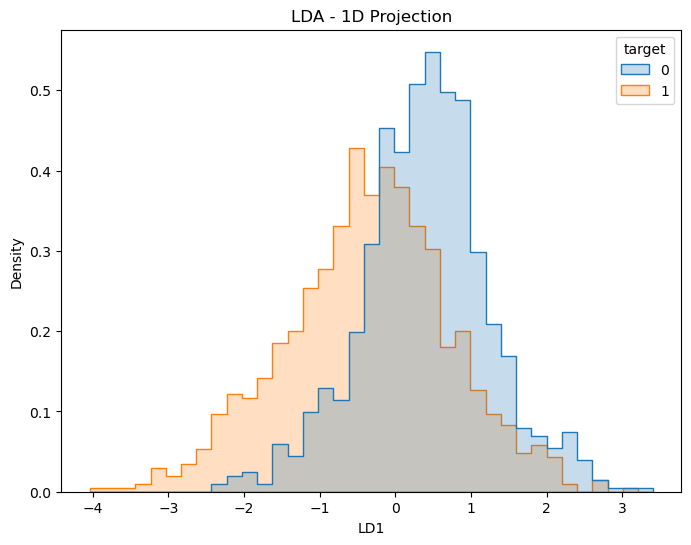

In [16]:
## 4. Linear Discriminant Analysis (LDA)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
lda = LDA()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

X_lda = lda.transform(X_scaled)
plt.figure(figsize=(8,6))
sns.histplot(x=X_lda[:,0], hue=y, element='step', stat='density', common_norm=False)
plt.title("LDA - 1D Projection")
plt.xlabel("LD1")
plt.show()


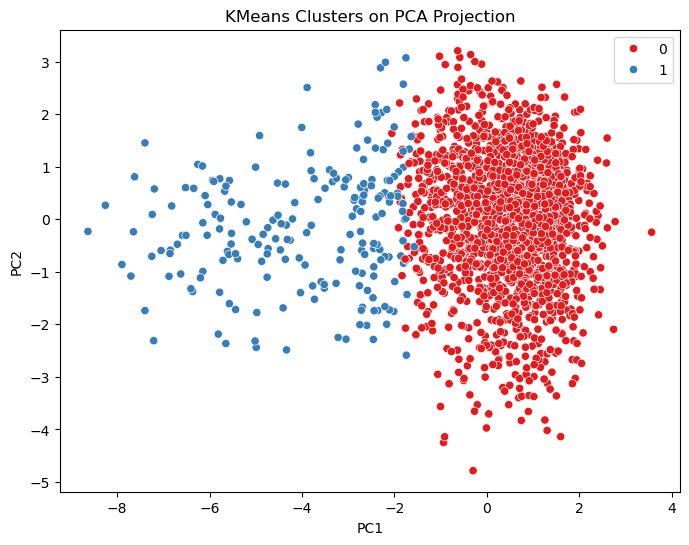

In [17]:
## 5. Optional: Clustering (e.g., KMeans)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_labels, palette='Set1')
plt.title("KMeans Clusters on PCA Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

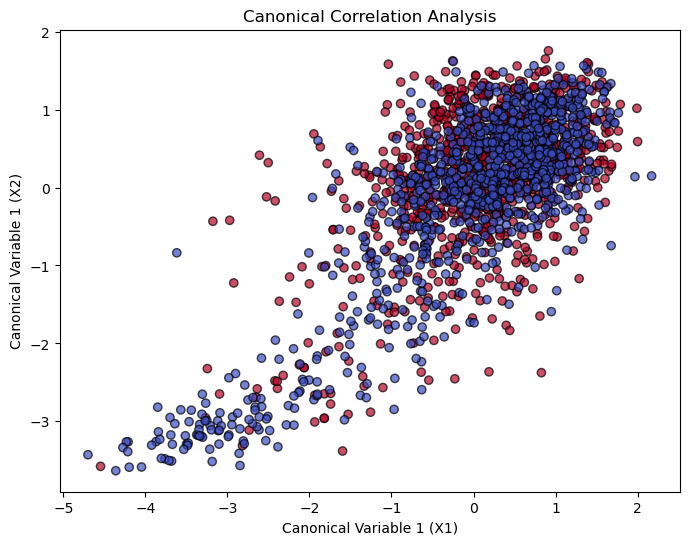

In [18]:
## 6. Canonical Correlation Analysis (CCA)
# Example: Split variables into two sets arbitrarily for demonstration
X1 = df[['danceability', 'energy', 'loudness']]
X2 = df[['acousticness', 'liveness', 'valence']]

# Standardize both sets
X1_scaled = StandardScaler().fit_transform(X1)
X2_scaled = StandardScaler().fit_transform(X2)

# Apply CCA
cca = CCA(n_components=2)
X1_c, X2_c = cca.fit_transform(X1_scaled, X2_scaled)

# Plot CCA results
plt.figure(figsize=(8,6))
plt.scatter(X1_c[:, 0], X2_c[:, 0], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel('Canonical Variable 1 (X1)')
plt.ylabel('Canonical Variable 1 (X2)')
plt.title('Canonical Correlation Analysis')
plt.show()

In [19]:
## 7. ANOVA - Example using 'energy' and 'target'
model = ols('energy ~ C(target)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA Table for Energy by Target:\n", anova_table)


ANOVA Table for Energy by Target:
               sum_sq      df        F    PR(>F)
C(target)   0.140399     1.0  3.17883  0.074749
Residual   88.996513  2015.0      NaN       NaN


In [20]:
## 8. MANOVA - Using multiple dependent variables
dependent_vars = '+'.join(['acousticness', 'danceability', 'energy', 'liveness', 'loudness'])
manova = MANOVA.from_formula(f'{dependent_vars} ~ target', data=df)
print("\nMANOVA Results:\n", manova.mv_test())


MANOVA Results:
                     Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept         Value  Num DF   Den DF   F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda  0.0218 5.0000 2011.0000 18015.9986 0.0000
         Pillai's trace  0.9782 5.0000 2011.0000 18015.9986 0.0000
 Hotelling-Lawley trace 44.7936 5.0000 2011.0000 18015.9986 0.0000
    Roy's greatest root 44.7936 5.0000 2011.0000 18015.9986 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
             target         Value  Num DF   Den DF  F Value Pr > F
------------------------------------------------------------------
              Wilks' lambda 0.9178 5.0000 2011.0000 36.0219 0.000